In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
pd.set_option("display.max_columns", None)
sns.set_theme(style = "whitegrid")
warnings.filterwarnings("ignore")

In [3]:
# reading the dataset

In [4]:
df = pd.read_csv("../datasets/university_admission_dataset.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
# shape of the data
df.shape

(500, 9)

In [6]:
# data types of all the attributes
df.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [7]:
# missing value detection
df.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [8]:
# drop the unnecessary columns
df.drop(columns = "Serial No.", inplace = True)
df.sample(10)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
120,335,117,5,5.0,5.0,9.56,1,0.94
388,296,97,2,1.5,2.0,7.80,0,0.49
313,301,100,3,3.5,3.0,8.04,0,0.67
280,311,102,3,4.5,4.0,8.64,1,0.68
288,314,104,4,5.0,5.0,9.02,0,0.82
400,304,100,2,3.5,3.0,8.22,0,0.63
464,298,97,2,2.0,3.0,7.21,0,0.45
376,297,96,2,2.5,2.0,7.43,0,0.34
175,320,111,4,4.5,3.5,8.87,1,0.85
251,316,99,2,2.5,3.0,9.00,0,0.70


In [9]:
# statistical summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


In [10]:
# univariate analysis

In [11]:
numerical_columns = df.select_dtypes(include = ["int", "float"]).columns.tolist()
print("Numerical Columns:\n", numerical_columns)

Numerical Columns:
 ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit ']


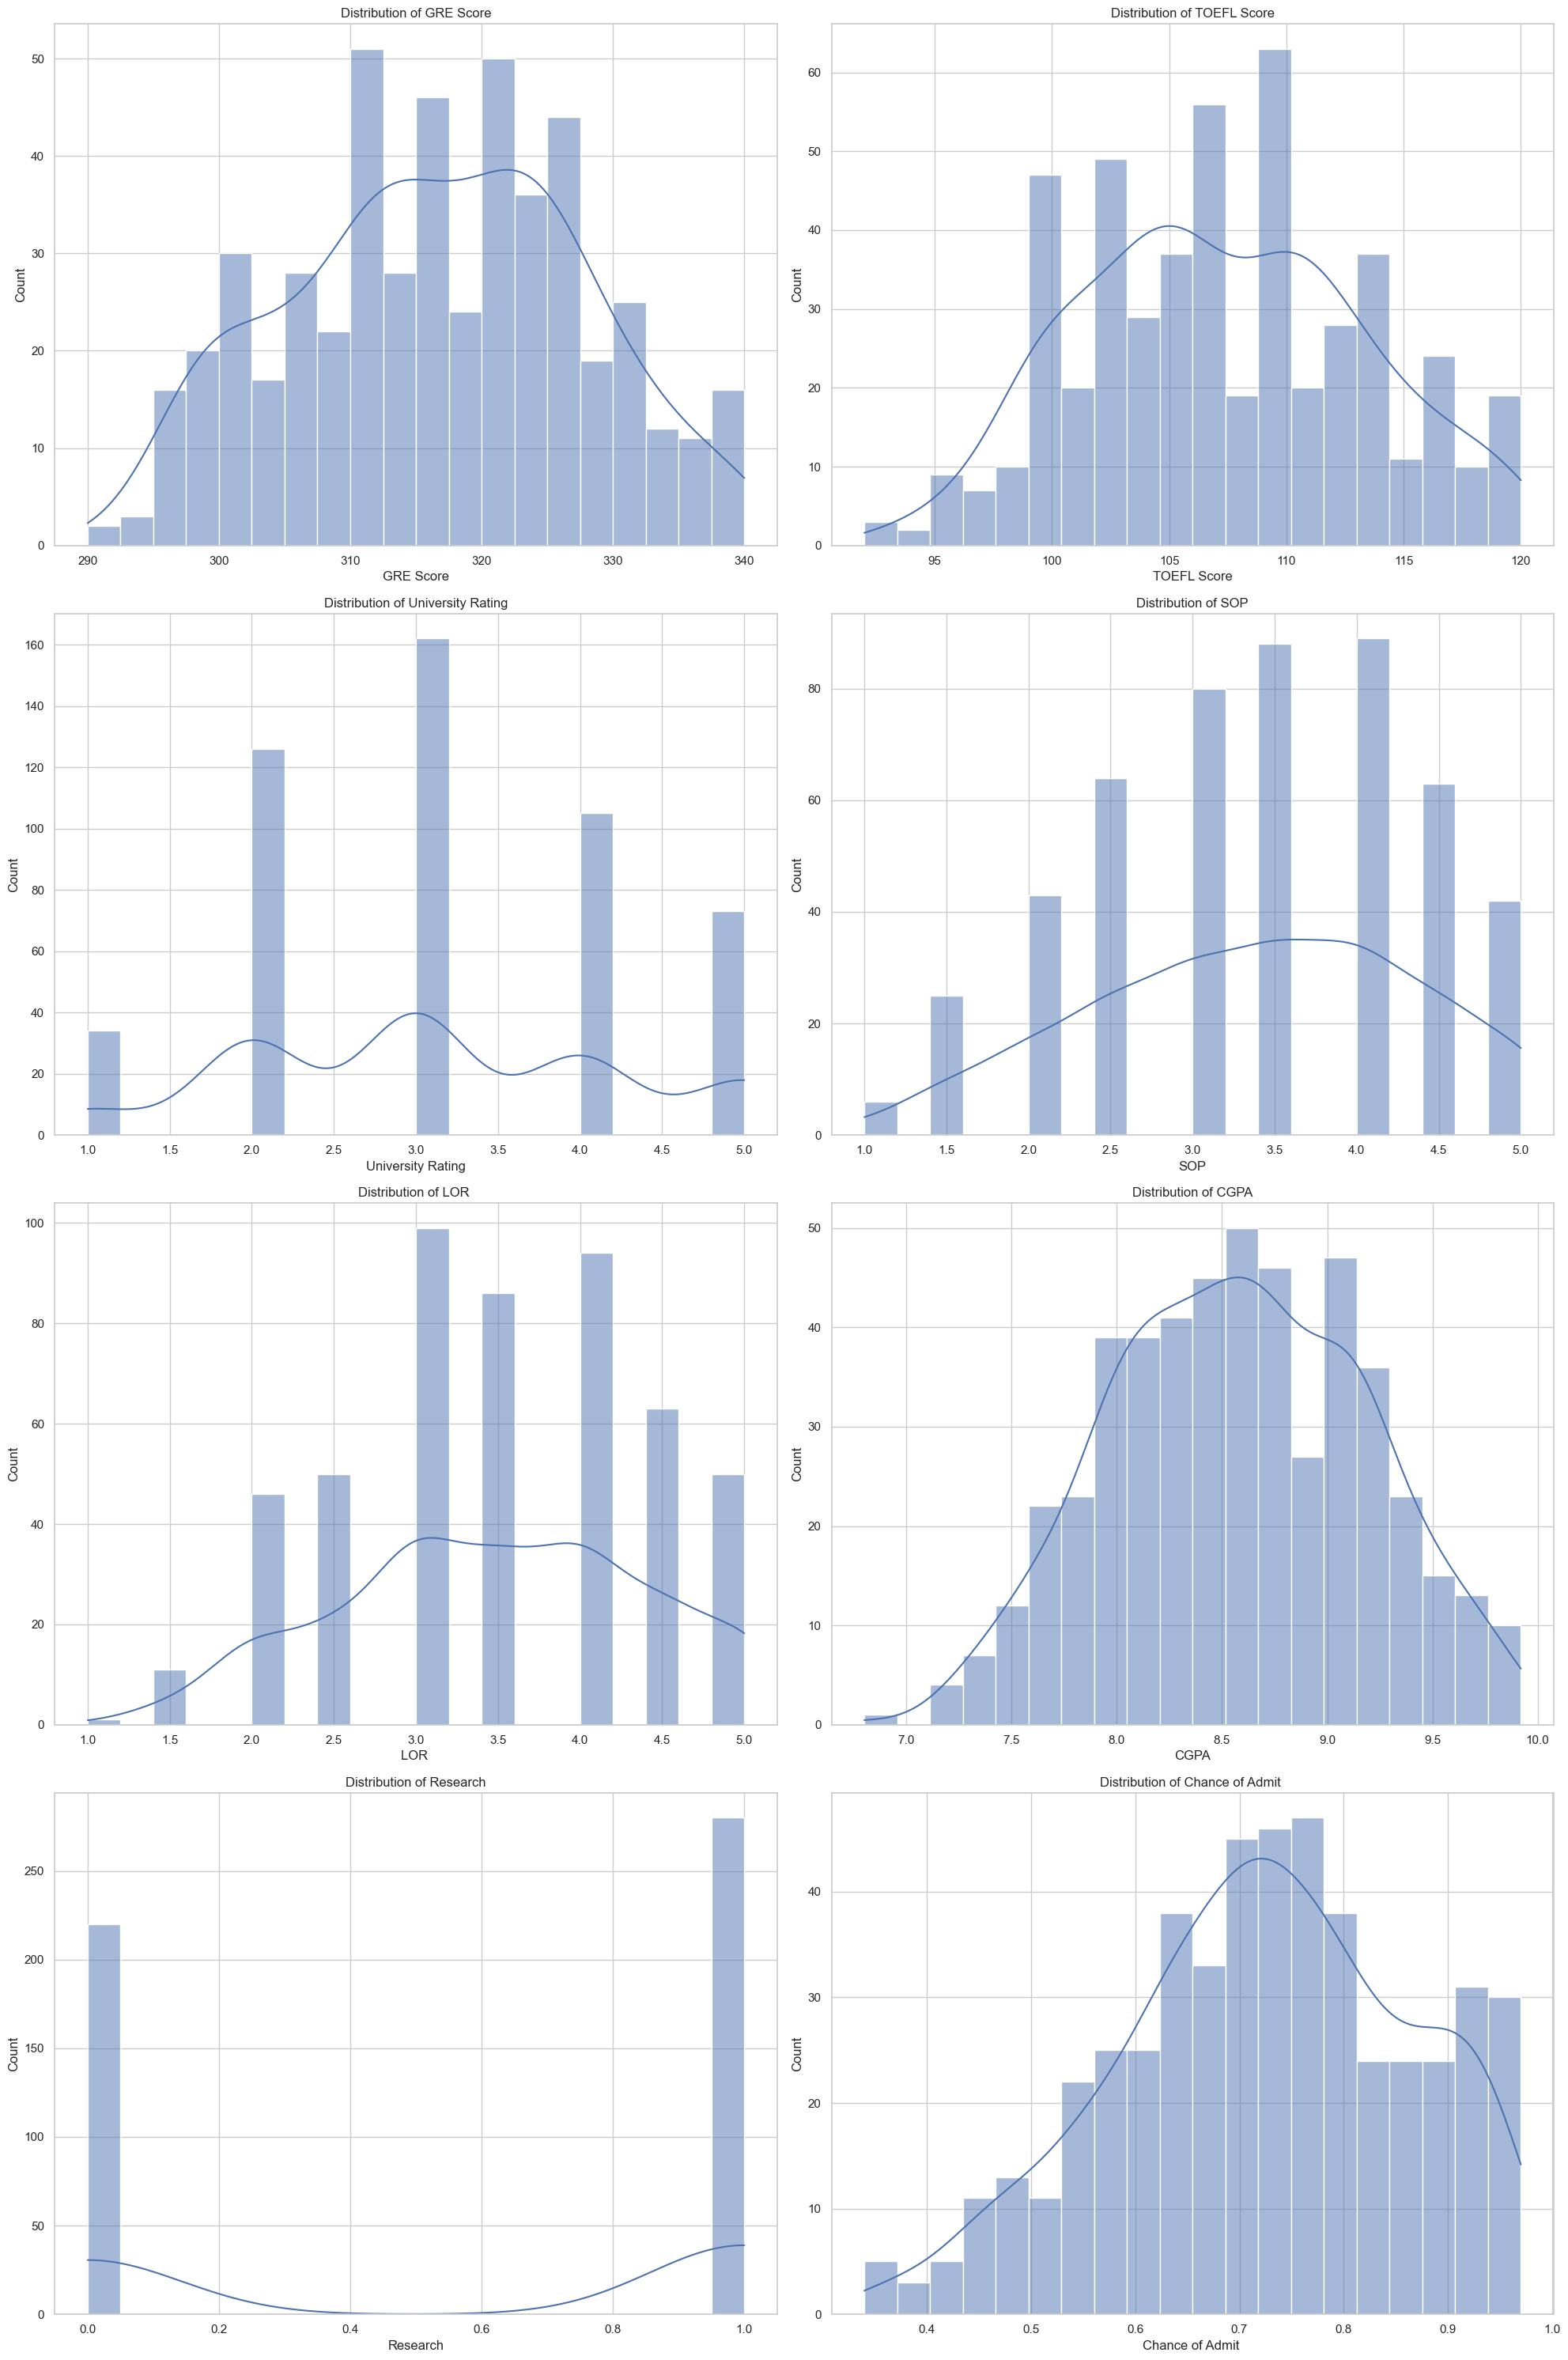

In [12]:
# ditribution of all numerical columns
plt.figure(figsize = (20, 30))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(4, 2, i)
    sns.histplot(df[column], kde=True, bins=20)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")
plt.tight_layout()
plt.savefig("../artifacts/distribution_plots_of_numerical_columns.png")
plt.show()

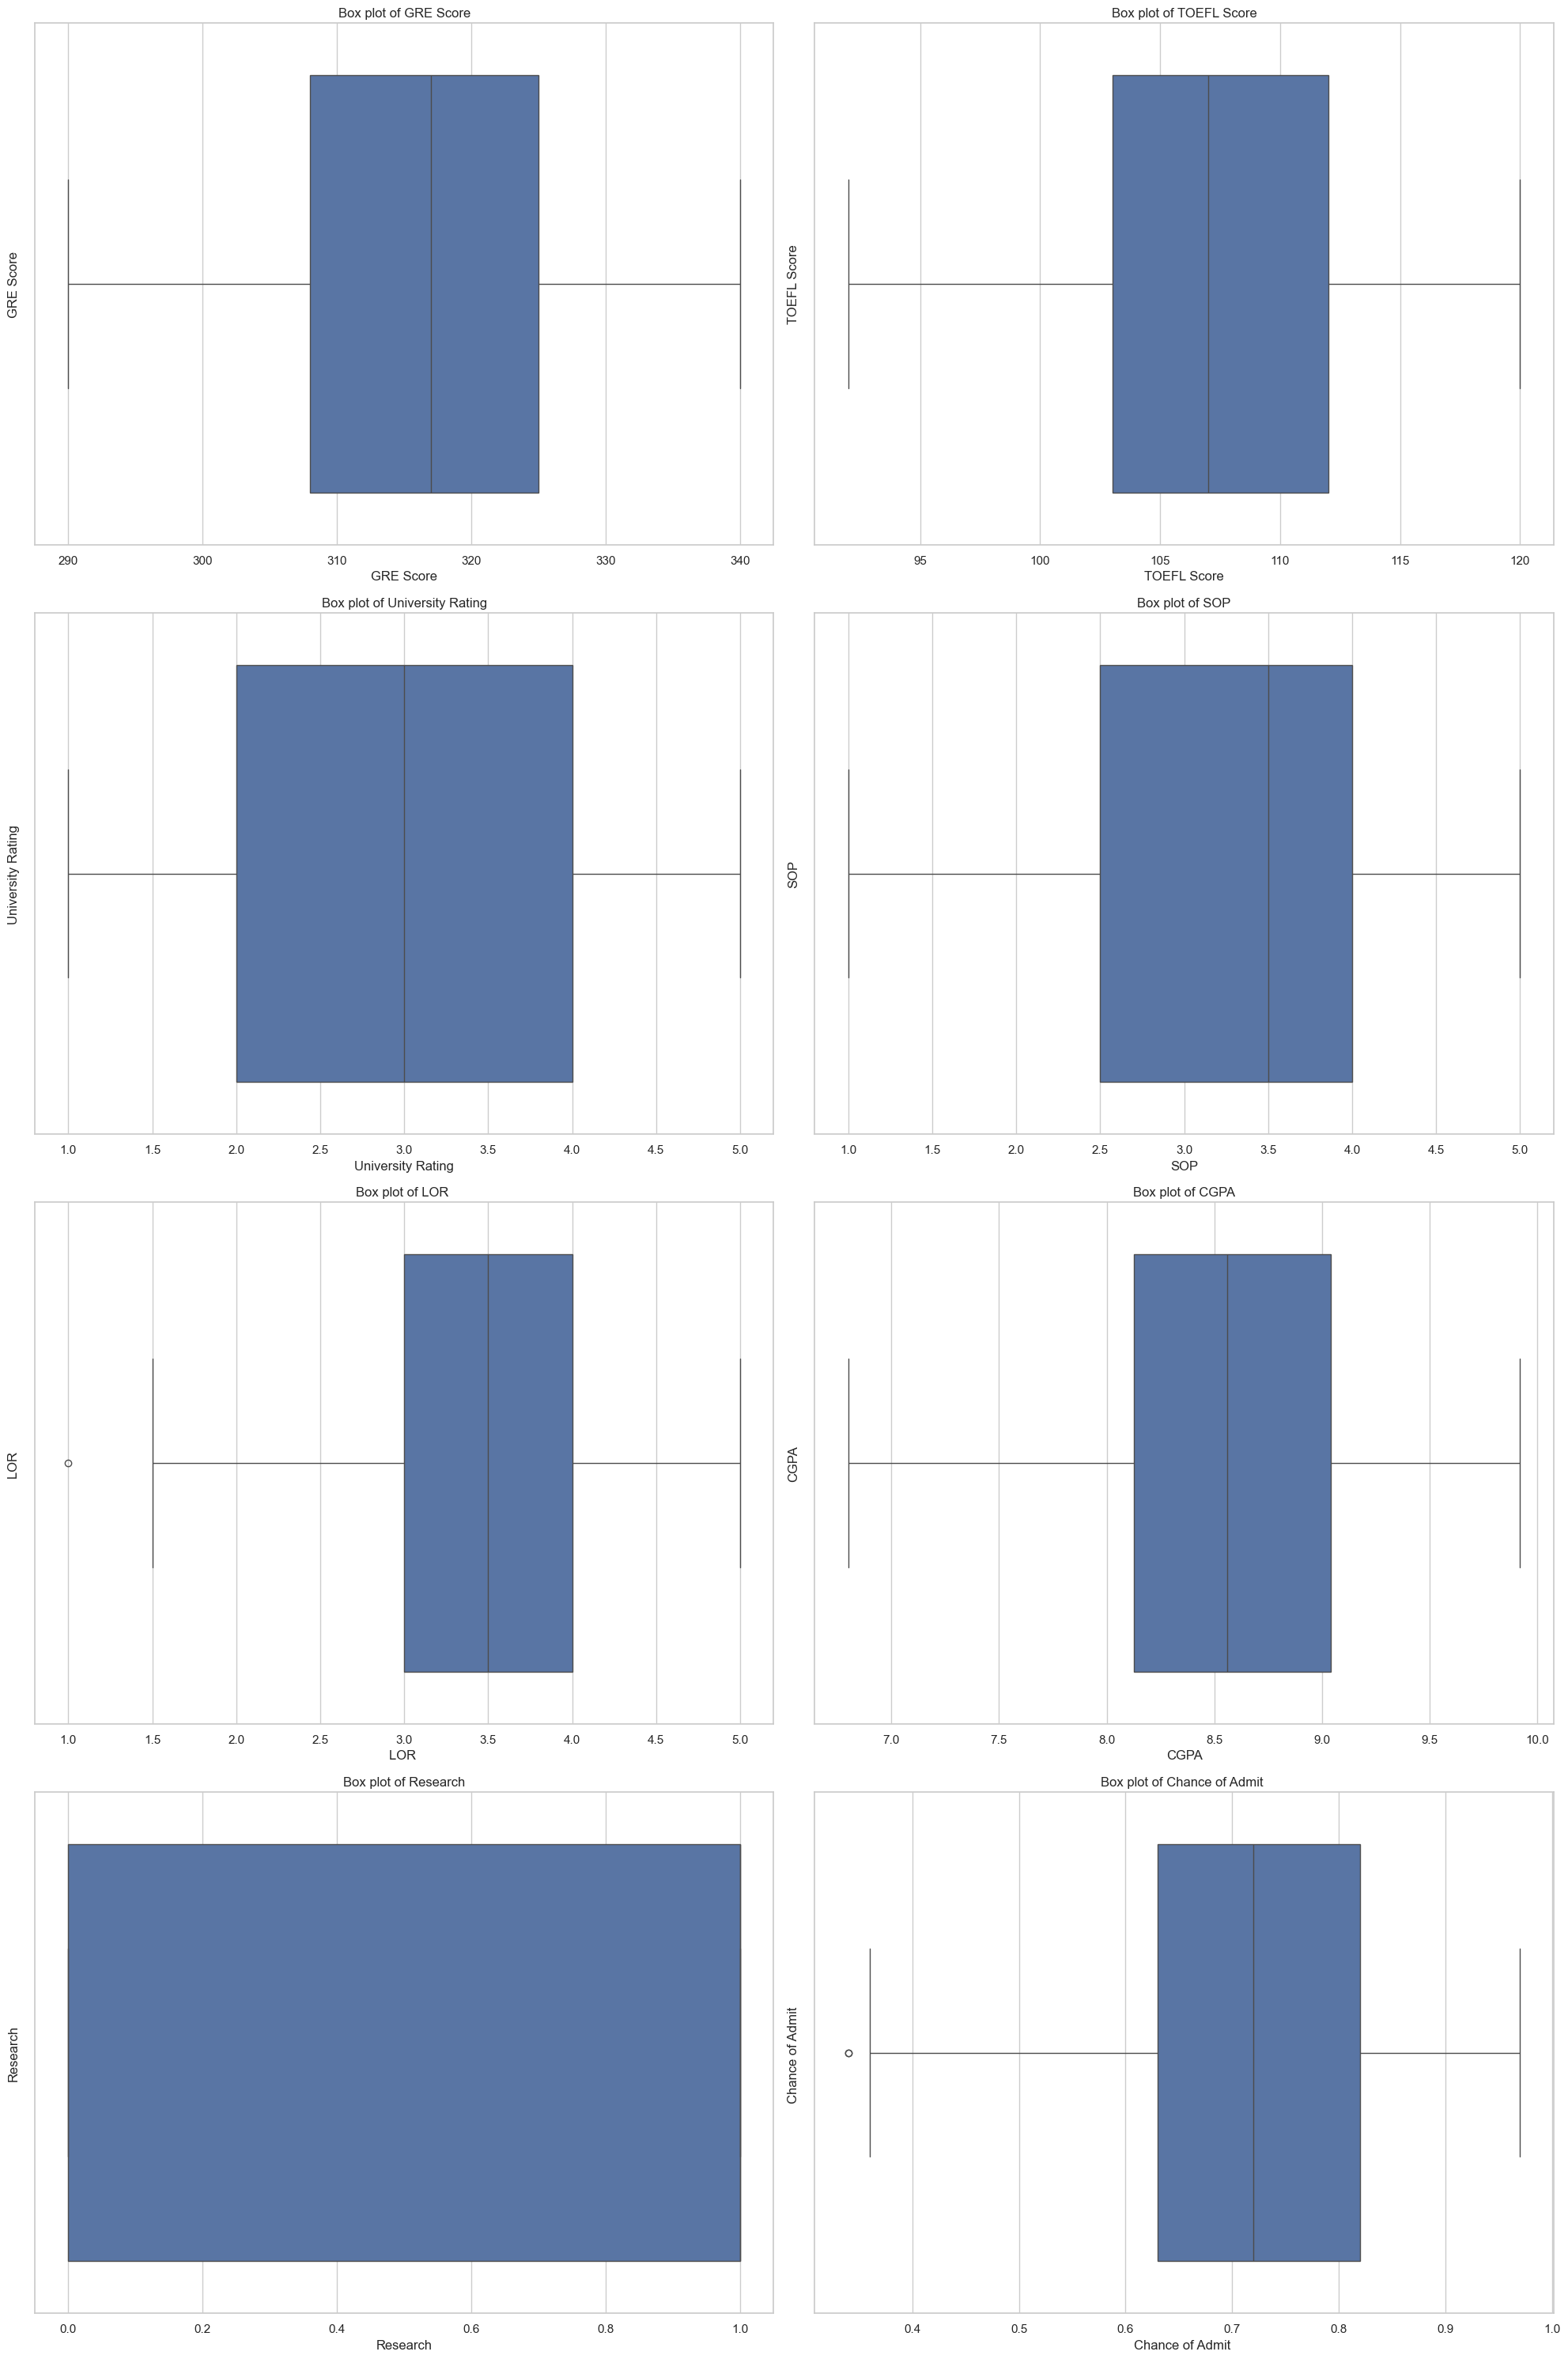

In [13]:
# box plot of all the numerical columns
plt.figure(figsize = (20, 30))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(data = df, x = column)
    plt.title(f"Box plot of {column}")
    plt.ylabel(column)
plt.tight_layout()
plt.savefig("../artifacts/box_plots_of_numerical_columns.png")
plt.show()

In [14]:
# bivariate analysis

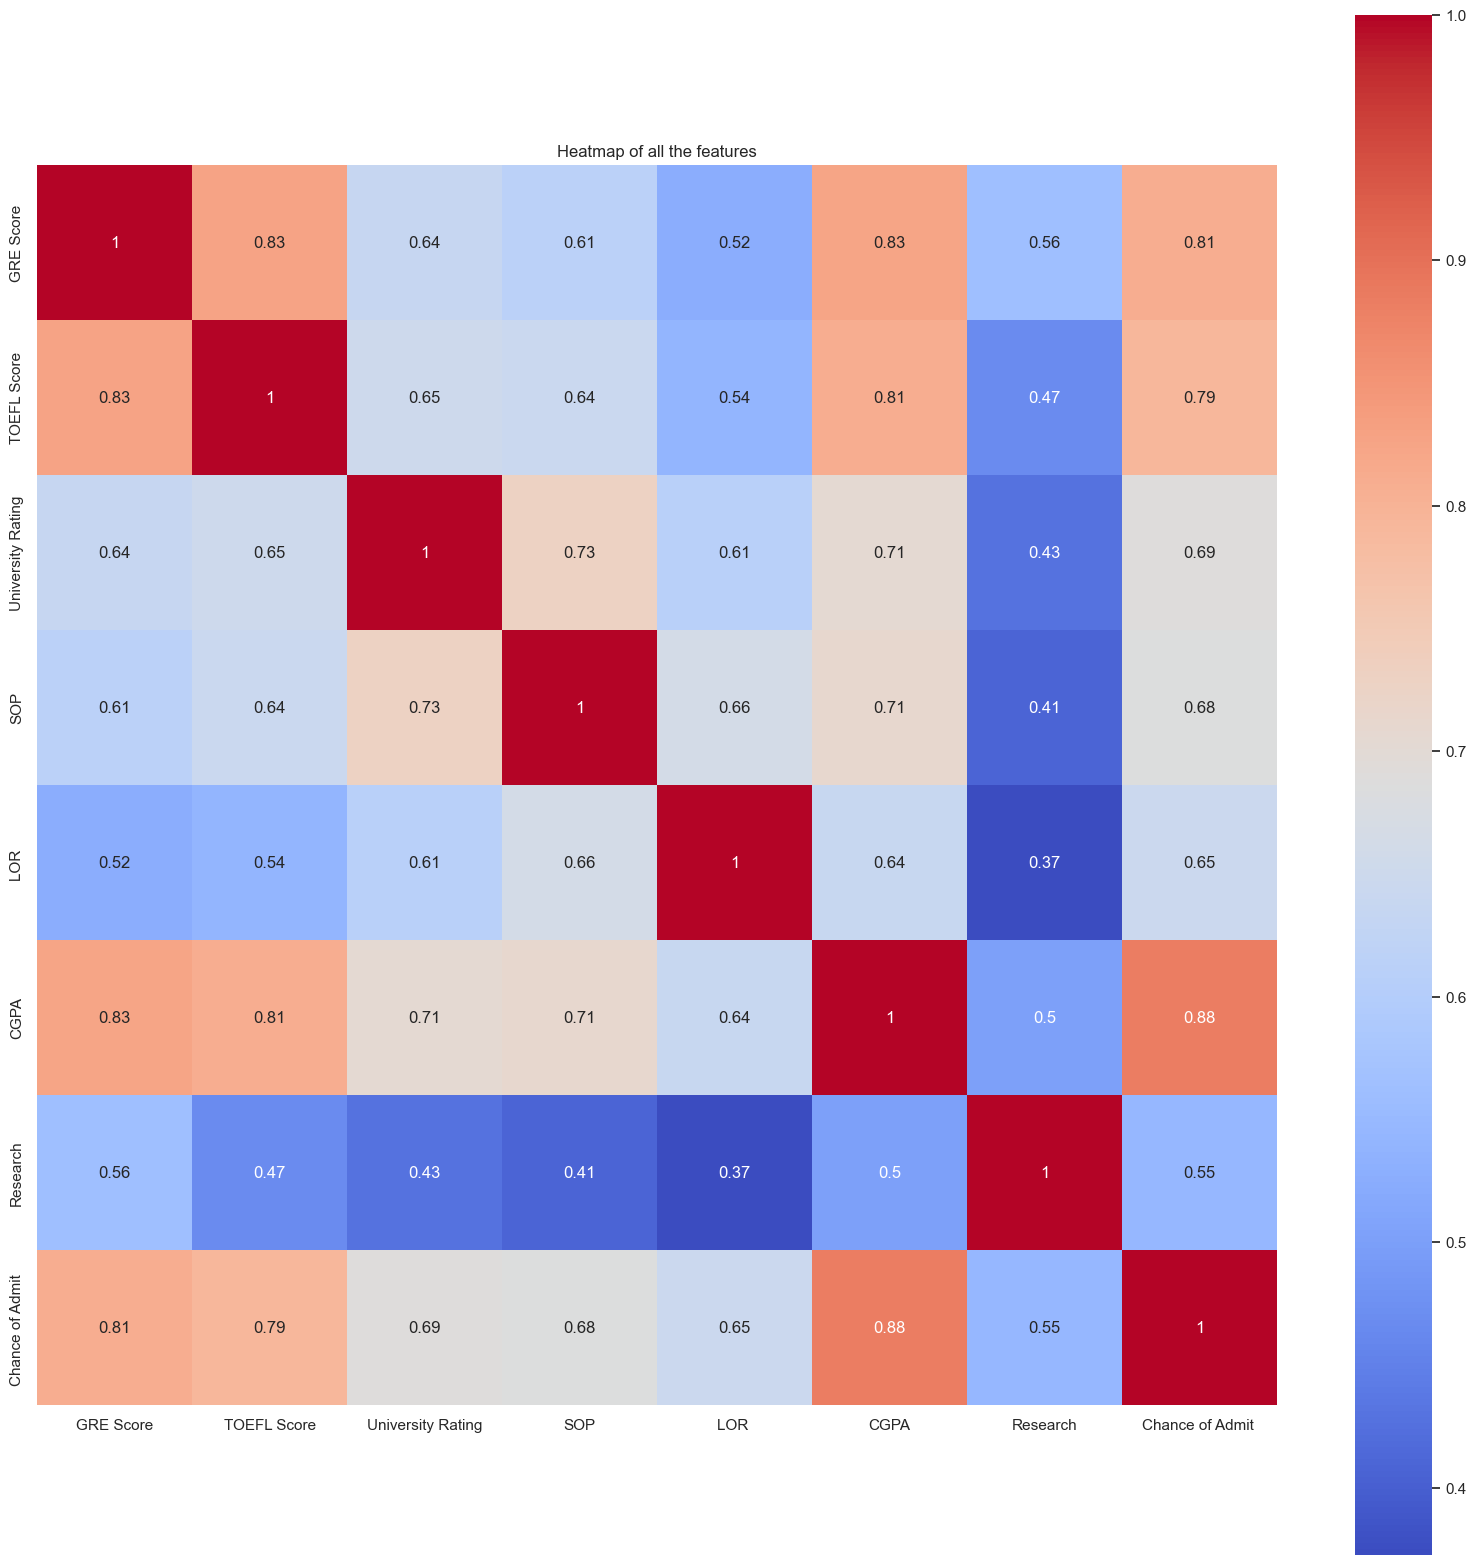

In [15]:
corr_matrix = df.corr()
plt.figure(figsize = (20, 20))
sns.heatmap(corr_matrix, annot = True, cmap = "coolwarm", square = True)
plt.title("Heatmap of all the features")
plt.savefig("../artifacts/heatmap_of_all_columns.png")
plt.show()

<Figure size 700x700 with 0 Axes>

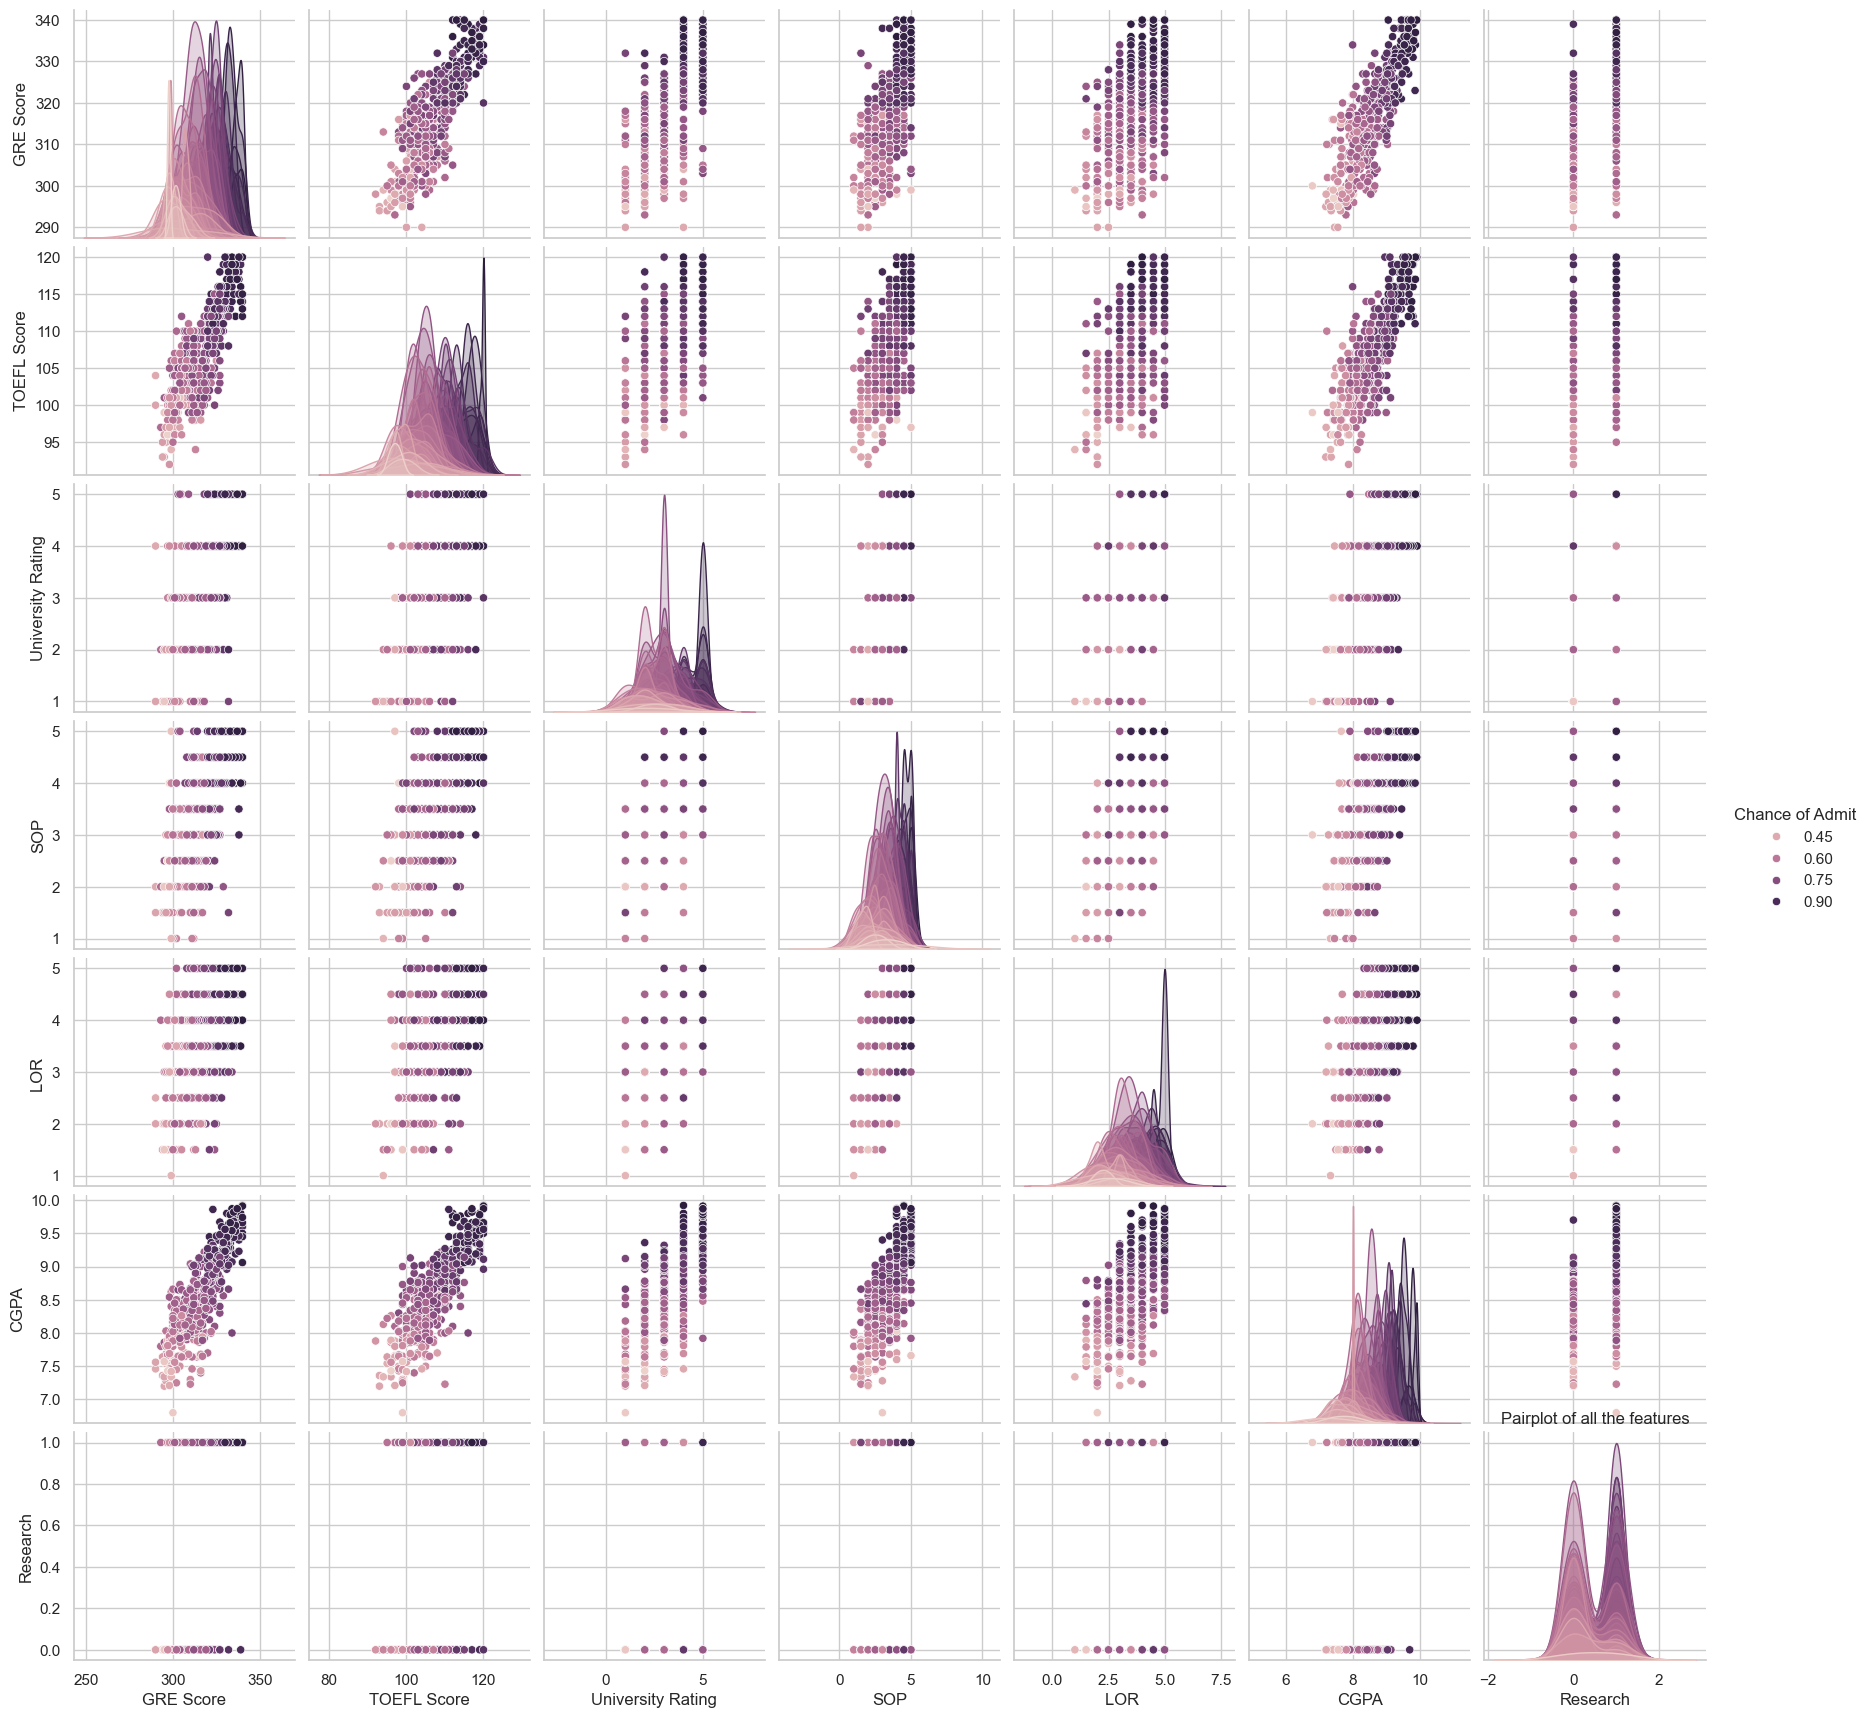

In [16]:
# pair plot of all the numerical columns
plt.figure(figsize = (7, 7))
sns.pairplot(df, hue = "Chance of Admit ")
plt.title("Pairplot of all the features")
plt.savefig("../artifacts/pair_plots_of_all_columns.png")
plt.show()

In [17]:
# data preprocessing

In [18]:
# duplicates
df.duplicated().sum()

0

In [19]:
# missing values
df.isna().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [20]:
# treating outliers

# conducting IQR analysis to detect outliers
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1

# set the threshold (k = 1.5)
k = 1.5
lower_bound = q1 - k * iqr
upper_bound = q3 + k * iqr

# potential outliers
outliers = ((df < lower_bound) | (df > upper_bound)).any(axis=1)

df = df[~ outliers]
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [21]:
# renaming the columns
df.rename(columns = {
    "GRE Score": "GRE_Score",
    "TOEFL Score": "TOEFL_Score",
    "University Ranking": "University_Ranking",
    "SOP": "SOP",
    "LOR ": "LOR",
    "CGPA": "CGPA",
    "Research": "Research",
    "Chance of Admit ": "Chance_Of_Admit",
    "Total Score": "Total_Score"
}, inplace = True)
df.head()

,GRE_Score,TOEFL_Score,University Rating,SOP,LOR,CGPA,Research,Chance_Of_Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [22]:
# separating the features and labels
x = df.drop(columns = "Chance_Of_Admit")
y = df["Chance_Of_Admit"]
x.shape, y.shape

((497, 7), (497,))

In [23]:
# splitting the training and testing data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((397, 7), (100, 7), (397,), (100,))

In [24]:
x.to_csv("../datasets/x.csv")
y.to_csv("../datasets/y.csv")
x_train.to_csv("../datasets/x_train.csv")
y_train.to_csv("../datasets/y_train.csv")
x_test.to_csv("../datasets/x_test.csv")
y_test.to_csv("../datasets/y_test.csv")

In [25]:
# scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [26]:
# model building

In [27]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()

# training the linear regression model
lr_model.fit(x_train, y_train)

LinearRegression()

In [28]:
# saving the model into a .pkl file
import pickle

with open("../artifacts/lr_model.pkl", "wb") as f:
    pickle.dump(lr_model, f)

In [29]:
# make the predictions on the test set
y_predicted = lr_model.predict(x_test)

In [30]:
# comments on model statistics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
print("----- Model Statistics: Linear Regression -----")
train_performance = lr_model.score(x_train, y_train)
print(f"Training performance = {train_performance}")
test_performance = lr_model.score(x_test, y_test)
print(f"Test performance = {test_performance}")
mse = mean_squared_error(y_test, y_predicted)
print(f"MSE = {mse}")
r2 = r2_score(y_test, y_predicted)
print(f"R2 Score = {r2}")
mae = mean_absolute_error(y_test, y_predicted)
print(f"MAE = {mae}")
rmse = np.sqrt(mse)
print(f"RMSE = {rmse}")
adjr2 = 1 - ((1 - r2) * (len(y) - 1)/ ((len(y) - x.shape[1] - 1)))
print(f"Adjusted R2 Score = {adjr2}")

----- Model Statistics: Linear Regression -----
Training performance = 0.8261392753723373
Test performance = 0.7958581715074224
MSE = 0.003673319896222301
R2 Score = 0.7958581715074224
MAE = 0.043640469350628194
RMSE = 0.060607919418359024
Adjusted R2 Score = 0.7929358958439295


In [31]:
# displaying the model coefficients with column names
print("-"*50)
print("Coefficients of the Linear Model with Column Names:")
print("-"*50)
column_names = list(df.columns)
column_names

for i in range(len(column_names) - 1):
    print(f"{column_names[i]} = {lr_model.coef_[i]}")

--------------------------------------------------
Coefficients of the Linear Model with Column Names:
--------------------------------------------------
GRE_Score = 0.022374345462375805
TOEFL_Score = 0.018305137095739207
University Rating = 0.002382711489305126
SOP = 0.005019114772415293
LOR = 0.016540565183535885
CGPA = 0.06817486216837958
Research = 0.011177608337611536


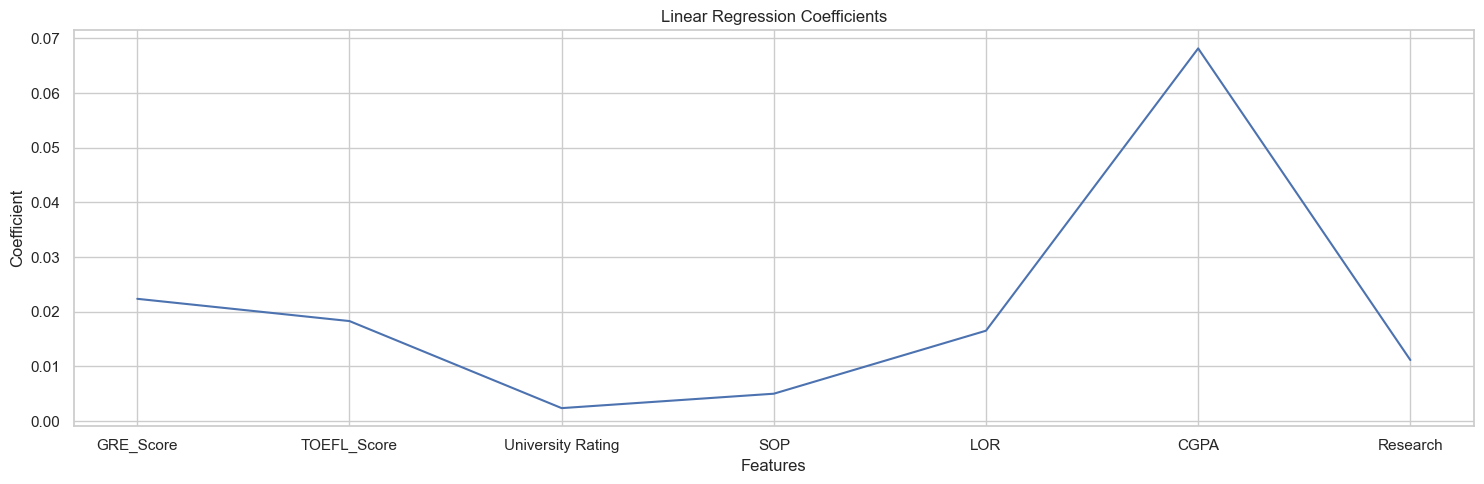

In [32]:
# plotting to visualize the effect of model coefficients
plt.figure(figsize = (15, 5))
plt.plot(column_names[0:-1], lr_model.coef_)
plt.title("Linear Regression Coefficients")
plt.xlabel("Features")
plt.ylabel("Coefficient")
plt.tight_layout()
plt.savefig("../artifacts/linear_regression_model_coefficients.png")
plt.show()

In [33]:
# trying out ridge regression

In [34]:
# ridge regression
from sklearn.linear_model import Ridge

# building the ridge regression model using train set
ridge_model = Ridge()
ridge_model.fit(x_train, y_train)

Ridge()

In [35]:
# make predictions on the test set
y_ridge_predicted = ridge_model.predict(x_test)

In [36]:
# comments on model statistics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
print("----- Model Statistics: Ridge Regression -----")
train_performance = ridge_model.score(x_train, y_train)
print(f"Training performance = {train_performance}")
test_performance = ridge_model.score(x_test, y_test)
print(f"Test performance = {test_performance}")
mse = mean_squared_error(y_test, y_ridge_predicted)
print(f"MSE = {mse}")
r2 = r2_score(y_test, y_ridge_predicted)
print(f"R2 Score = {r2}")
mae = mean_absolute_error(y_test, y_ridge_predicted)
print(f"MAE = {mae}")
rmse = np.sqrt(mse)
print(f"RMSE = {rmse}")
adjr2 = 1 - ((1 - r2) * (len(y) - 1)/ ((len(y) - x.shape[1] - 1)))
print(f"Adjusted R2 Score = {adjr2}")

----- Model Statistics: Ridge Regression -----
Training performance = 0.8261347965926602
Test performance = 0.7956587073942554
MSE = 0.003676909045496064
R2 Score = 0.7956587073942554
MAE = 0.04367711686561249
RMSE = 0.06063752176248683
Adjusted R2 Score = 0.7927335764162591


In [37]:
# displaying the model coefficients with column names
print("-"*50)
print("Coefficients of the Ridge Model with Column Names:")
print("-"*50)
column_names = list(df.columns)
column_names

for i in range(len(column_names) - 1):
    print(f"{column_names[i]} = {ridge_model.coef_[i]}")

--------------------------------------------------
Coefficients of the Ridge Model with Column Names:
--------------------------------------------------
GRE_Score = 0.022556762336687495
TOEFL_Score = 0.018435400674081483
University Rating = 0.002499735978133235
SOP = 0.005147469227411206
LOR = 0.016592364653661266
CGPA = 0.06754331166590241
Research = 0.011169035571279802


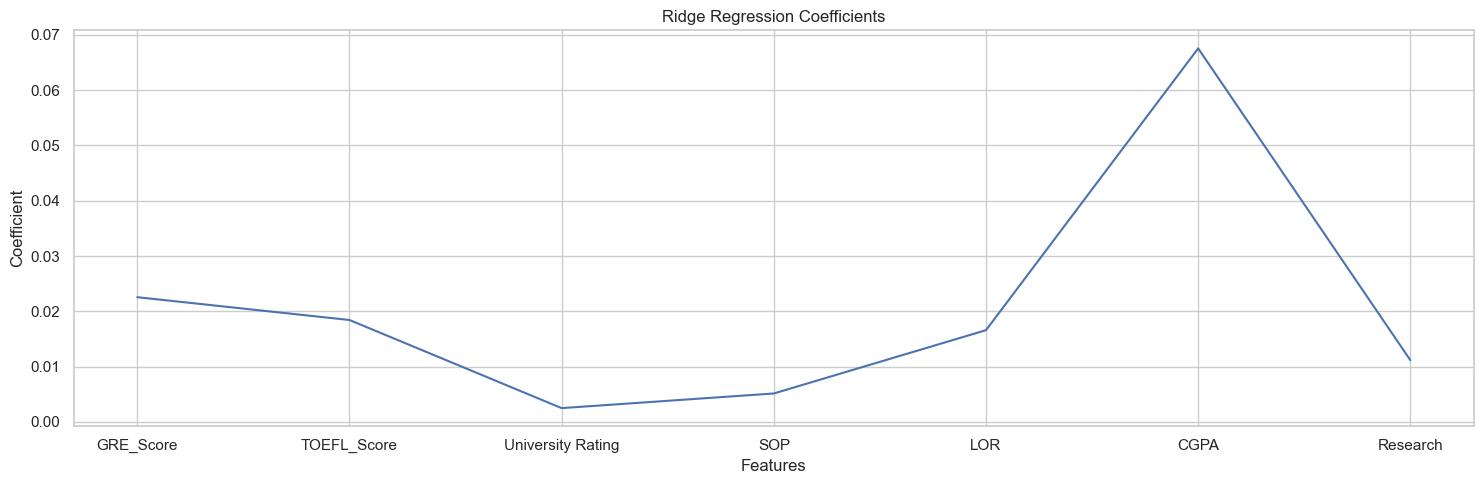

In [38]:
# plotting to visualize the effect of model coefficients
plt.figure(figsize = (15, 5))
plt.plot(column_names[0:-1], ridge_model.coef_)
plt.title("Ridge Regression Coefficients")
plt.xlabel("Features")
plt.ylabel("Coefficient")
plt.tight_layout()
plt.savefig("../artifacts/ridge_regression_model_coefficients.png")
plt.show()

In [39]:
# trying out lasso regression

In [40]:
# lasso regression
from sklearn.linear_model import Lasso

# building the lasso regression model using the train set
lasso_model = Lasso()
lasso_model.fit(x_train, y_train)

Lasso()

In [41]:
# make predictions on the test set
y_lasso_predicted = lasso_model.predict(x_test)

In [42]:
# comments on model statistics (lasso regression)
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
print("----- Model Statistics: Lasso Regression -----")
train_performance = lasso_model.score(x_train, y_train)
print(f"Training performance = {train_performance}")
test_performance = lasso_model.score(x_test, y_test)
print(f"Test performance = {test_performance}")
mse = mean_squared_error(y_test, y_lasso_predicted)
print(f"MSE = {mse}")
r2 = r2_score(y_test, y_lasso_predicted)
print(f"R2 Score = {r2}")
mae = mean_absolute_error(y_test, y_lasso_predicted)
print(f"MAE = {mae}")
rmse = np.sqrt(mse)
print(f"RMSE = {rmse}")
adjr2 = 1 - ((1 - r2) * (len(y) - 1)/ ((len(y) - x.shape[1] - 1)))
print(f"Adjusted R2 Score = {adjr2}")

----- Model Statistics: Lasso Regression -----
Training performance = 0.0
Test performance = -0.04885279753095717
MSE = 0.018873015284660143
R2 Score = -0.04885279753095717
MAE = 0.10657581863979854
RMSE = 0.13737909333177353
Adjusted R2 Score = -0.0638670502563492


In [43]:
# displaying the model coefficients with column names
print("-"*50)
print("Coefficients of the Lasso Model with Column Names:")
print("-"*50)
column_names = list(df.columns)
column_names

for i in range(len(column_names) - 1):
    print(f"{column_names[i]} = {lasso_model.coef_[i]}")

--------------------------------------------------
Coefficients of the Lasso Model with Column Names:
--------------------------------------------------
GRE_Score = 0.0
TOEFL_Score = 0.0
University Rating = 0.0
SOP = 0.0
LOR = 0.0
CGPA = 0.0
Research = 0.0


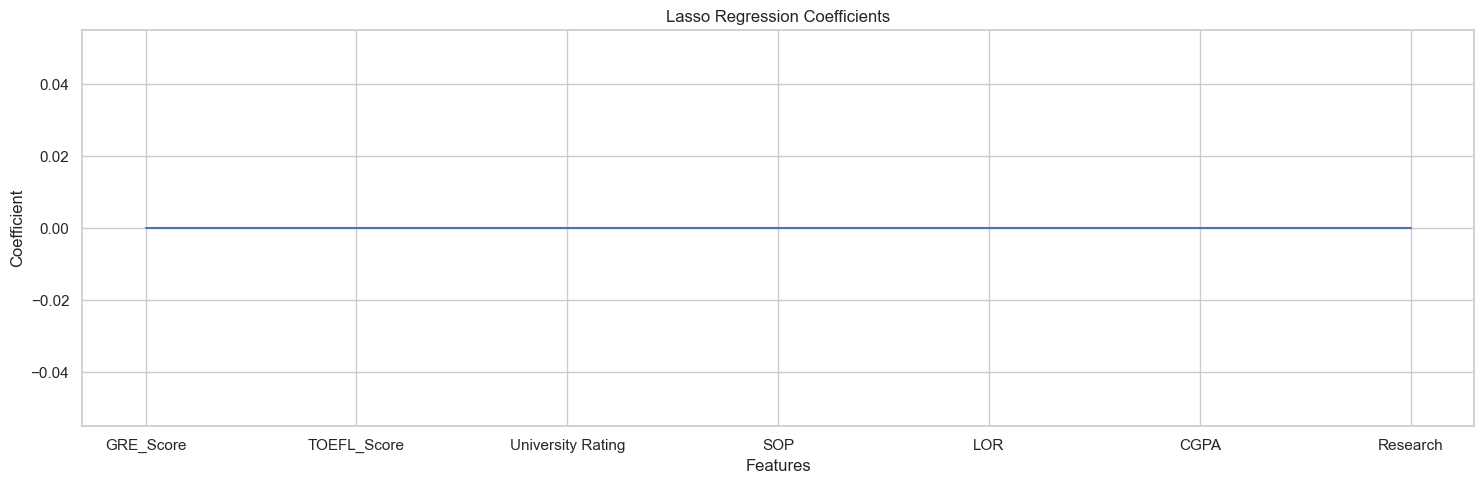

In [44]:
# plotting to visualize the effect of model coefficients
plt.figure(figsize = (15, 5))
plt.plot(column_names[0:-1], lasso_model.coef_)
plt.title("Lasso Regression Coefficients")
plt.xlabel("Features")
plt.ylabel("Coefficient")
plt.tight_layout()
plt.savefig("../artifacts/lasso_regression_model_coefficients.png")
plt.show()

In [45]:
# testing the assumptions of linear regression model

In [46]:
# building the linear regression model again
lr_model = LinearRegression()

# building the linear regression model using the train set
lr_model.fit(x_train, y_train)

# make the predictions on the test set
y_predicted = lr_model.predict(x_test)

In [47]:
# multi-collinearity check by VIF score (VIF scores should be below 5, which is the defined limit)
from statsmodels.stats.outliers_influence import variance_inflation_factor

col = df[['GRE_Score', 'TOEFL_Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance_Of_Admit']]
x1 = np.array(x_train)
vif = []
for i in range(x1.shape[1]):
    vif.append(round(variance_inflation_factor(x1, i),2))

vif_score= pd.DataFrame({
    'Columns':['GRE_score', 'TOEFL_score', 'University_rating', 'SOP', 'LOR', 'CGPA','Research'],
    'VIF score':vif
})
vif_score

,Columns,VIF score
0,GRE_score,4.34
1,TOEFL_score,3.65
2,University_rating,2.70
3,SOP,2.93
4,LOR,2.11
5,CGPA,4.98
6,Research,1.51


In [48]:
# mean value of residuals should be nearly zero
residuals = y_train - lr_model.predict(x_train)
mean_residuals = np.mean(residuals)
print(f"Mean of Residuals = {mean_residuals}")

Mean of Residuals = 5.033756786713556e-18


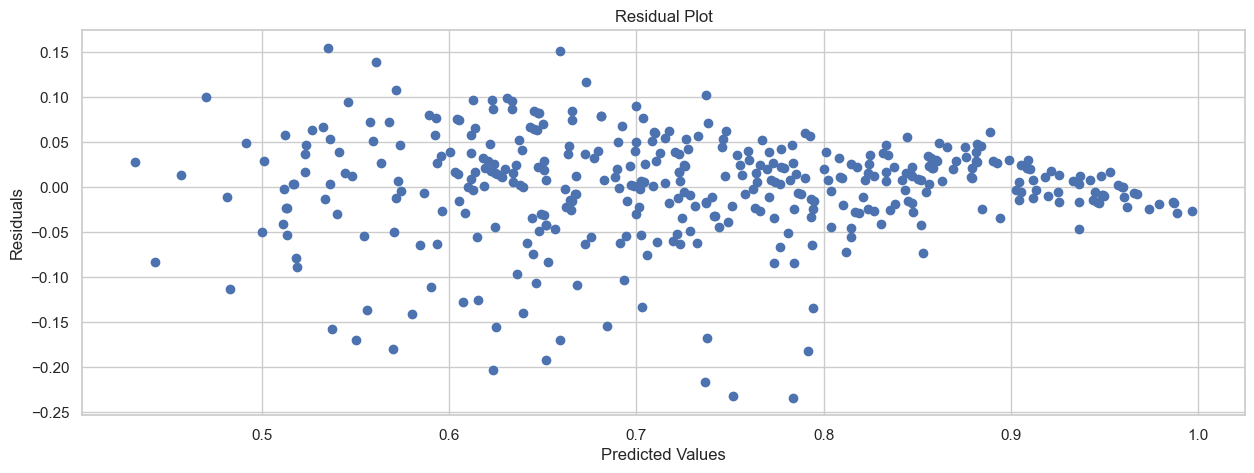

In [49]:
# linearity of variables
plt.figure(figsize = (15, 5))
plt.scatter(lr_model.predict(x_train), residuals)
plt.title("Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.savefig("../artifacts/linearity_of_variables.png")
plt.show()

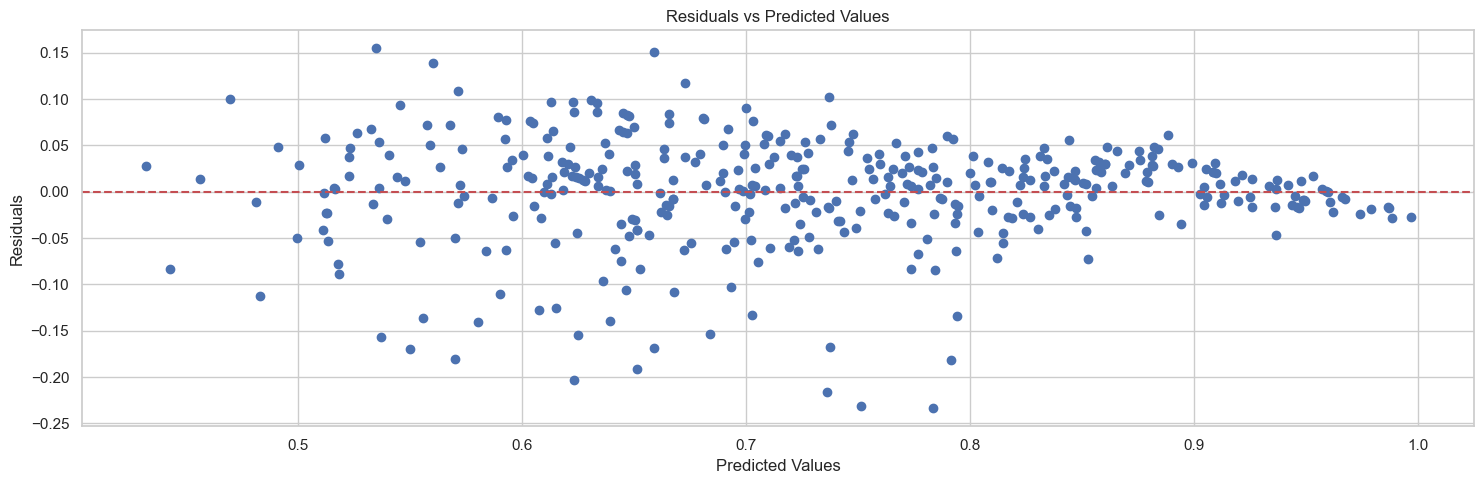

In [50]:
# test for homoskedasticity
plt.figure(figsize = (15, 5))
plt.scatter(lr_model.predict(x_train), residuals)
plt.axhline(y = 0, color = "r", linestyle = "--")
plt.title("Residuals vs Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.tight_layout()
plt.savefig("../artifacts/homoskedasticity.png")
plt.show()

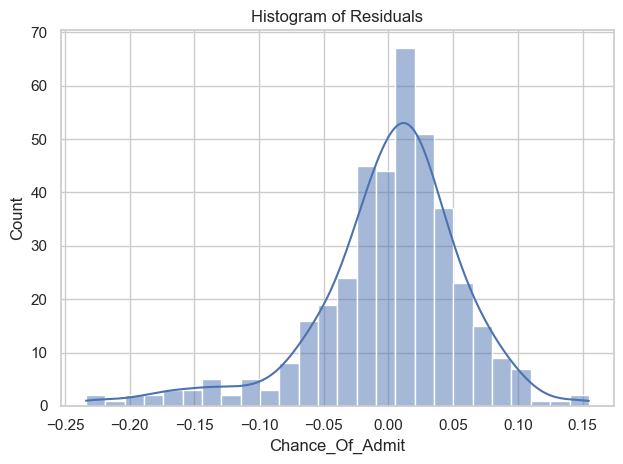

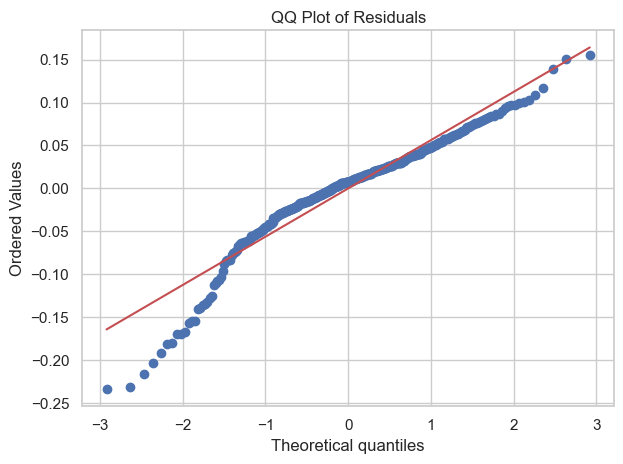

In [51]:
# normality of residuals
from scipy.stats import probplot

# histogram
sns.histplot(residuals, kde = True)
plt.title("Histogram of Residuals")
plt.tight_layout()
plt.savefig("../artifacts/normality_of_residuals_histogram_of_residuals.png")
plt.show()

# qq-plot
probplot(residuals, plot = plt)
plt.title("QQ Plot of Residuals")
plt.tight_layout()
plt.savefig("../artifacts/normality_of_residuals_qq_plot_of_residuals.png")
plt.show()

In [52]:
# performance evaluation

In [53]:
# mae, rmse, r2, adj-r2
mse = mean_squared_error(y_test, y_predicted)
print(f"MSE = {mse}")
r2 = r2_score(y_test, y_predicted)
print(f"R2 Score = {r2}")
mae = mean_absolute_error(y_test, y_predicted)
print(f"MAE = {mae}")
rmse = np.sqrt(mse)
print(f"RMSE = {rmse}")
adjr2 = 1 - ((1 - r2) * (len(y) - 1)/ ((len(y) - x.shape[1] - 1)))
print(f"Adjusted R2 Score = {adjr2}")

MSE = 0.003673319896222301
R2 Score = 0.7958581715074224
MAE = 0.043640469350628194
RMSE = 0.060607919418359024
Adjusted R2 Score = 0.7929358958439295


In [54]:
# train and test performance check
train_performance = lr_model.score(x_train, y_train)
print(f"Training performance = {train_performance}")
test_performance = lr_model.score(x_test, y_test)
print(f"Test performance = {test_performance}")

Training performance = 0.8261392753723373
Test performance = 0.7958581715074224


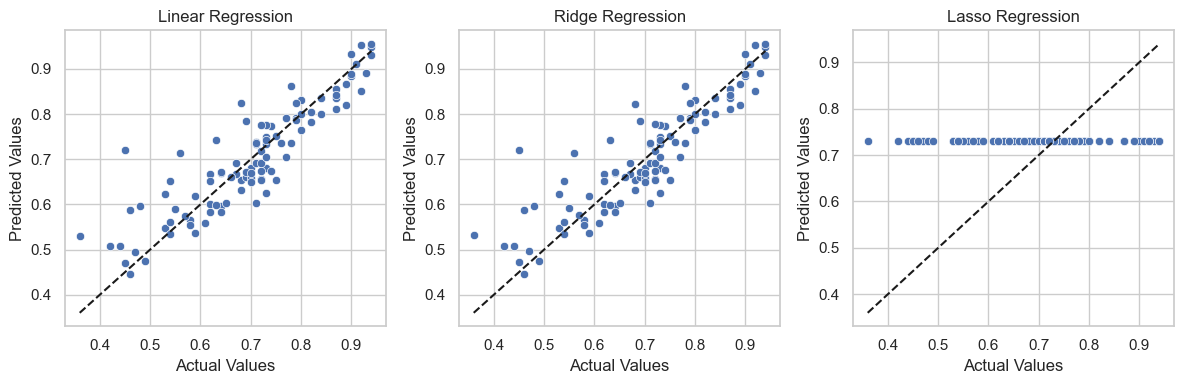

In [55]:
# comments on the performance measures and if there is any need to improve the model or not

# identifying the best model by plotting

actual_values = y_test.values.reshape((-1))
predicted_values = [y_predicted.reshape((-1)), y_ridge_predicted.reshape((-1)), y_lasso_predicted.reshape((-1))]
model = ["Linear Regression", "Ridge Regression", "Lasso Regression"]

plt.figure(figsize=(12, 4))
i = 1
for preds in predicted_values:
    ax = plt.subplot(1, 3, i)
    sns.scatterplot(x=actual_values, y=preds)
    plt.plot([min(actual_values), max(actual_values)], [min(actual_values), max(actual_values)], 'k--')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(model[i-1])
    i += 1

plt.tight_layout()
plt.savefig("../artifacts/best_model.png")
plt.show()